In [9]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)



--2019-08-26 01:53:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.160.208
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.160.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: '/tmp/sarcasm.json'

/tmp/sarcasm.json   100%[===================>]   5.38M  1.51MB/s    in 3.9s    

2019-08-26 01:53:13 (1.39 MB/s) - '/tmp/sarcasm.json' saved [5643545/5643545]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d_1 (G

20000/20000 [==============================] - 7s 339us/sample - loss: 0.0248 - accuracy: 0.9894 - val_loss: 1.8532 - val_accuracy: 0.7900
Epoch 45/50
20000/20000 [==============================] - 7s 336us/sample - loss: 0.0267 - accuracy: 0.9890 - val_loss: 1.9051 - val_accuracy: 0.7882
Epoch 46/50
20000/20000 [==============================] - 7s 347us/sample - loss: 0.0188 - accuracy: 0.9918 - val_loss: 1.9864 - val_accuracy: 0.7866
Epoch 47/50
20000/20000 [==============================] - 7s 330us/sample - loss: 0.0180 - accuracy: 0.9923 - val_loss: 2.0107 - val_accuracy: 0.7863
Epoch 48/50
20000/20000 [==============================] - 7s 345us/sample - loss: 0.0265 - accuracy: 0.9891 - val_loss: 1.9072 - val_accuracy: 0.7858
Epoch 49/50
20000/20000 [==============================] - 8s 390us/sample - loss: 0.0192 - accuracy: 0.9915 - val_loss: 1.9467 - val_accuracy: 0.7876
Epoch 50/50
20000/20000 [==============================] - 7s 362us/sample - loss: 0.0172 - accuracy: 0.99

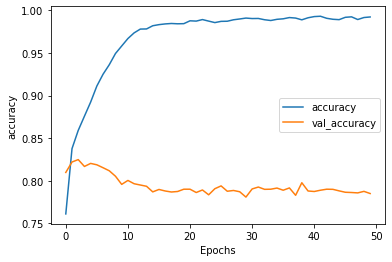

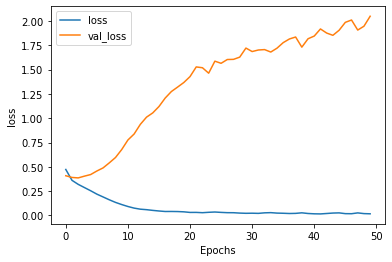

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')